In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import os
import copy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
feature_list = ['GHS','LK','LLF1','LLF2','LPSS','LST']
label_mark = 'GT'

In [3]:
def read_im_data(dirname,size):
    size = str(size)
    one_image_data = pd.DataFrame(data=None,columns=feature_list)
    for feature_name in feature_list:
        feature_data = pd.read_csv('./extracted/'+dirname+'/'+size+'/'+feature_name+'.csv',header=-1)
        feature_size = feature_data.values.shape[0]*feature_data.values.shape[1]
        one_image_data[feature_name] = list(map(lambda x: x[0],feature_data.values.reshape(feature_size,1)))
    one_image_labels = pd.read_csv('./extracted/'+dirname+'/'+size+'/'+label_mark+'.csv',header=-1)
    im_size = one_image_labels.shape
    one_image_labels = list(map(lambda x: x[0],one_image_labels.values.reshape(feature_size,1)))
    one_image_labels = pd.DataFrame(data=one_image_labels,columns=[label_mark])
    return one_image_data,one_image_labels,im_size

In [4]:
def show_result(y_pred,y_gt,im_size):
    y_pred = y_pred.reshape(im_size)
    y_gt = y_gt.reshape(im_size)
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(y_gt)
    plt.subplot(122)
    plt.imshow(y_pred)

In [5]:
classifiers={'21': xgb.XGBClassifier(),
             '15': xgb.XGBClassifier(),
             '11': xgb.XGBClassifier()}

In [6]:
booster21 = xgb.Booster()
booster15 = xgb.Booster()
booster11 = xgb.Booster()
booster21.load_model('classifier21.bin')
booster15.load_model('classifier15.bin')
booster11.load_model('classifier11.bin')

In [7]:
classifiers['21']._Booster = booster21
classifiers['15']._Booster = booster15
classifiers['11']._Booster = booster11

In [8]:
sample_name = 'motion0009'

In [9]:
X,y,shape = read_im_data(sample_name,21)
y_pred = classifiers['21'].predict_proba(X)
y_pred_class0 = y_pred[:,0]
y_class = np.array(list(map(int,y_pred_class0>0.5)))

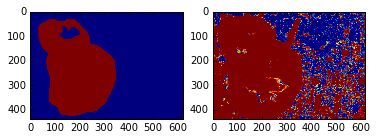

In [10]:
show_result(y_pred_class0,y.values[:,0],shape)

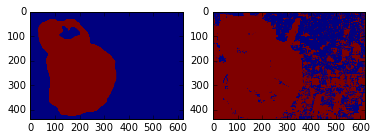

In [11]:
show_result(y_class,y.values[:,0],shape)

In [12]:
roc_auc_score(y.values[:,0],y_pred_class0)

0.85699950083856369

In [13]:
accuracy_score(y.values[:,0],y_class)

0.61395881006864994

In [14]:
f1_score(y.values[:,0],y_class)

0.61377634669069314

In [15]:
X,y,shape = read_im_data(sample_name,15)
y_pred = classifiers['15'].predict_proba(X)
y_pred_class0 = y_pred[:,0]
y_class = np.array(list(map(int,y_pred_class0>0.5)))

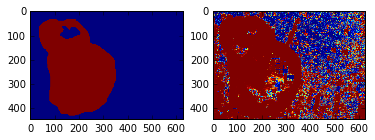

In [16]:
show_result(y_pred_class0,y.values[:,0],shape)

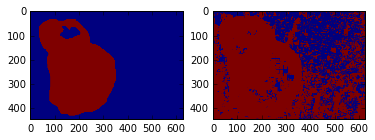

In [17]:
show_result(y_class,y.values[:,0],shape)

In [18]:
roc_auc_score(y.values[:,0],y_pred_class0)

0.83624117861331115

In [19]:
f1_score(y.values[:,0],y_class)

0.5853297398623637

In [20]:
accuracy_score(y.values[:,0],y_class)

0.58999055236227005

In [21]:
X,y,shape = read_im_data(sample_name,11)
y_pred = classifiers['11'].predict_proba(X)
y_pred_class0 = y_pred[:,0]
y_class = np.array(list(map(int,y_pred_class0>0.5)))

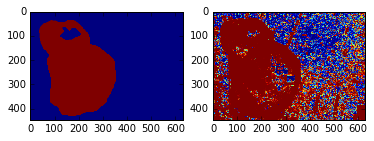

In [22]:
show_result(y_pred_class0,y.values[:,0],shape)

In [23]:
show_result(y_class,y.values[:,0],shape)

In [24]:
roc_auc_score(y.values[:,0],y_pred_class0)

0.83843974632496732

In [25]:
f1_score(y.values[:,0],y_class)

0.58333909738578993

In [26]:
accuracy_score(y.values[:,0],y_class)

0.59357622243528285

In [27]:
# bs_classifier.py

import numpy as np
import scipy as sp
import pandas as pd
import xgboost as xgb
import array
from xgboost.sklearn import XGBClassifier

def posterior(features,size):
    #features = map(list,map(None,*features))
    classifier =  classifiers['11']
#     XGBClassifier()
#     booster = xgb.Booster()
#     booster.load_model('./models/BSmodel'+size+'.bin')
#     classifier._Booster=booster
    result = classifier.predict_proba(features)
    result_blur = result[0][:int(result.shape[1]/2)]
    result_clear = result[1][:int(result.shape[1]/2)]
    result_solid = result[2][int(result.shape[1]/2):]
    return [result_blur,result_clear,result_solid]

In [28]:
a = posterior(X,11)

In [29]:
k = 500
a[0][k]+a[1][k]+a[2][k]

IndexError: index 500 is out of bounds for axis 0 with size 1

In [ ]:
c[1]

In [ ]:
show_result(a[2],y.values[:,0],shape)

In [ ]:
roc_auc_score(y.values[:,0],a[0])

In [ ]:
1-roc_auc_score(y.values[:,0],a[1])

In [ ]:
a[1][0]

In [ ]:
a[2][0]